## EDA of Breast Cancer

### Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
Attribute Information:
1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
    -- 1 = the patient survived 5 years or longer 
    -- 2 = the patient died within 5 year


In [6]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
!pip install matplotlib pandas seaborn bokeh plotly

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [38]:
df_Breast = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Breast_cancer_survival.csv')
df_Breast.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [39]:
df_Breast.info() #There are 306 rows with 4 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 306 non-null    int64
 1   Years_of_operation  306 non-null    int64
 2   Pos_axillary_nodes  306 non-null    int64
 3   Status              306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [41]:
df_Breast.describe(include='all') #There are are 306 columns. Min Age is 30 and max age is 83. MAx number of aux nodes detected is 4 and min is 0. 

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [42]:
df_Breast['Years_of_operation'] = df_breast.Years_of_operation + 1900 #Converting the year to from 62 to 1962 etc

In [43]:
df_Breast.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,1964,1,1
1,30,1962,3,1
2,30,1965,0,1
3,31,1959,2,1
4,31,1965,4,1


In [ ]:
# df_breast['Status'] = df_breast.Status.map({1:'Survived', 2: 'Passed Away'})  #map 1 to Survived & 2 to Passed Away

In [44]:
df_Breast.describe(include='all')

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,1962.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,1958.000000,0.000000,1.000000
25%,44.000000,1960.000000,0.000000,1.000000
50%,52.000000,1963.000000,1.000000,1.000000
75%,60.750000,1965.750000,4.000000,2.000000
max,83.000000,1969.000000,52.000000,2.000000


In [45]:
df_Breast.shape

(306, 4)

In [51]:
df_Breast["Status"].value_counts() #225 of them survived for more than 5 years and 81 passed away within 5 years

1    225
2     81
Name: Status, dtype: int64

In [52]:
df_Survived = df_Breast[df_breast['Status'] == 1]
df_Survived

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,1964,1,1
1,30,1962,3,1
2,30,1965,0,1
3,31,1959,2,1
4,31,1965,4,1
...,...,...,...,...
298,73,1968,0,1
300,74,1963,0,1
301,75,1962,1,1
302,76,1967,0,1


In [166]:
df_PassedAway = df_Breast[df_breast['Status'] == 2]

In [54]:
df_Survived.describe(include = 'all')

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,1962.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,1958.000000,0.000000,1.0
25%,43.000000,1960.000000,0.000000,1.0
50%,52.000000,1963.000000,0.000000,1.0
75%,60.000000,1966.000000,3.000000,1.0
max,77.000000,1969.000000,46.000000,1.0


In [55]:
df_PassedAway.describe(include = 'all')

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,1962.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,1958.000000,0.000000,2.0
25%,46.000000,1959.000000,1.000000,2.0
50%,53.000000,1963.000000,4.000000,2.0
75%,61.000000,1965.000000,11.000000,2.0
max,83.000000,1969.000000,52.000000,2.0


### Observations:
- The dataset consists 306 patients on survival details (Survives Vs Passed Away within 5 years of Operation) spread over the years 1958 and 1969
- 225 patients surived over 5 years, whereas 81 patients passed away
- The patients were from the age of 30 to 83. 
- There is a correlation between survival and the number of Positive axillary nodes (hereafter referred to as nodes). 
    It can be seen that nodes detected in patients who passed away is significantly higher than in patients who survived. In patients who passed away, more than 75% of them had 11 or more nodes upto a maximum of 52 nodes in a patient; whereas in patients who survived, 50% of them had 0 nodes and 75% of them 3 nodes and less. To further prove the point, it can be seen that average of nodes is 2.79 in Survived patients against 7.46 in patients who passed away. Thus deduced that,those who survived have about 2.5 times less nodes than those who did not survive. 
- Though the minimum age of patients is 30, the average age of patients in the data set is closer to 53 years which implies, women above 50 years of age have to be careful about breast cancer and need to be regularly tested for the same. 


## Univariate Analyis

In [72]:
df_Breast['Status'] = df_Breast['Status'].replace([1,2],['Survived','Passed Away'])  #Replace 1 & 2 with Appropriate Status for better readability
df_Breast.tail()

,Age,Years_of_operation,Pos_axillary_nodes,Status
301,75,1962,1,Survived
302,76,1967,0,Survived
303,77,1965,3,Survived
304,78,1965,1,Passed Away
305,83,1958,2,Passed Away


Text(0.5, 1.0, 'Status of Survival')

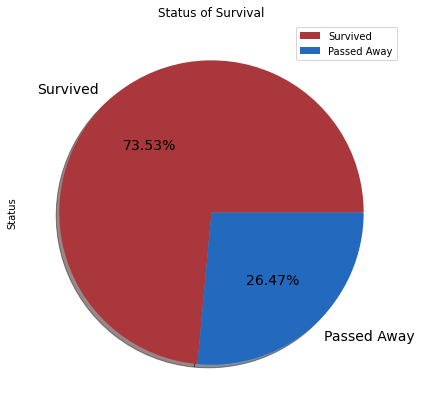

In [250]:
df_Breast['Status'].value_counts().plot(kind='pie',figsize = (10,7), autopct='%.2f%%',shadow=True, legend = True, cmap = 'vlag_r',fontsize =14)
plt.title('Status of Survival')

Text(0.5, 1.0, 'Comparison between Age of Patients who Survived and Passed Away')

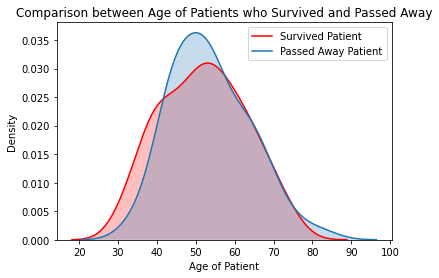

In [145]:
#Comparing the 2 distributions in Single Plot (Comparison of Age of Survived Patients and Passes Away patients)
sns.kdeplot(df_Survived['Age'],color='r', shade=True, Label='Survived Patient') 
sns.kdeplot(df_PassedAway['Age'], shade=True, Label ='Passed Away Patient')
plt.xlabel('Age of Patient') 
plt.ylabel('Density') 
plt.title('Comparison between Age of Patients who Survived and Passed Away')

Text(0.5, 1.0, 'Comparion of Year of Operation')

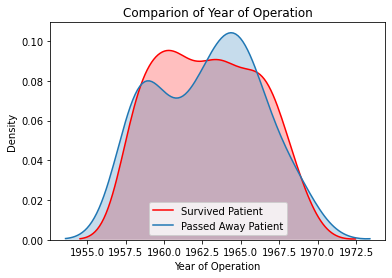

In [161]:
#Comparing the 2 distributions in Single Plot (Comparison of Years of Operation of Survived Patients and Passes Away patients)
sns.kdeplot(df_Survived['Years_of_operation'],color='r', shade=True, Label='Survived Patient')
sns.kdeplot(df_PassedAway['Years_of_operation'], shade=True, Label ='Passed Away Patient')
plt.xlabel('Year of Operation') 
plt.ylabel('Density') 
plt.title('Comparion of Year of Operation')

Text(0.5, 1.0, 'Comparison between Positive Axillary Nodes of Patients who Survived and Passed Away')

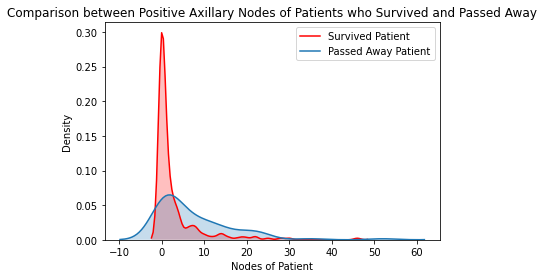

In [206]:
#Comparing the 2 distributions in Single Plot (Comparison of Age of Survived Patients and Passes Away patients)
sns.kdeplot(df_Survived['Pos_axillary_nodes'],color='r', shade=True, Label='Survived Patient') 
sns.kdeplot(df_PassedAway['Pos_axillary_nodes'], shade=True, Label ='Passed Away Patient')
plt.xlabel('Nodes of Patient') 
plt.ylabel('Density') 
plt.title('Comparison between Positive Axillary Nodes of Patients who Survived and Passed Away')

### Observation
- It can be observed from the first PIE chart that close to 75% of patients survived the operation for more than 5 years
- It can be noted from the First KDE Comparison Plot for Ages : Ages 30–40 had a higher chance of survival, whereas that was not the case for ages between 40-60. For ages 60+ the chances of survival were about 50/50.
- It can be noted from the Second KDE Comparison Plot for Year of Operation that:
    - More patients survived from the years 1959 - 1962
    - From 1962 - 1966, more patients passed away
    - There is major overlap between the years 1958-1959 and 1966 - 1970, and hence no relation can be detailed
- From the Third KDE Comparison Plot for Positive Axillary Nodes, it can be noted that 
    - most of the patients who survived had less than 5 Positive Axilary Nodes.
    - As the number of nodes increased, the number of patients who passed away also increased compared to the Survived patients. 
    - If nodes > 30, most patients have not survived. 

## Bivariate Analysis

Text(0, 0.5, 'Positive Axillary Nodes')

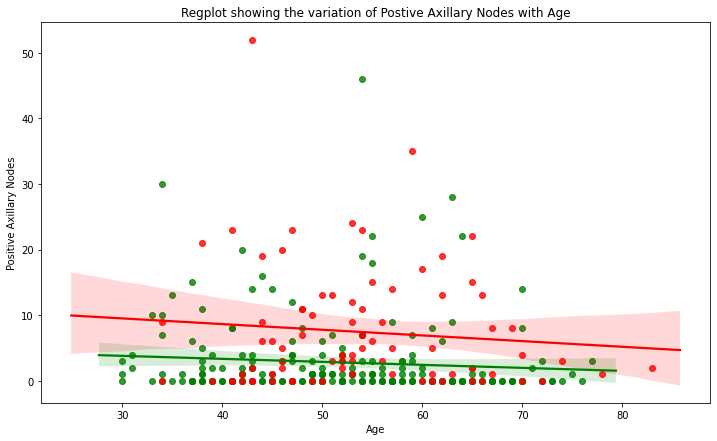

In [228]:
plt.figure(figsize=(12,7))
sns.regplot(data=df_Survived, y='Pos_axillary_nodes', x='Age', color='Green',  label='Survived Patient') 
sns.regplot(data=df_PassedAway, y='Pos_axillary_nodes', x='Age', color='Red', label ='Passed Away Patient')
plt.title('Regplot showing the variation of Postive Axillary Nodes with Age')
plt.ylabel('Positive Axillary Nodes')

### Observation:
From the above chart, we can see that 
    - The nodes are primarily lesser than 30 for most patients.
    - There are hardly less than 2% patients with nodes greater than 30
    - Irrespective of age, if number of nodes is less than 1, there is more likelihood to survive
    - As age is greater than 50 and number of nodes increase, more patients are likely to pass away

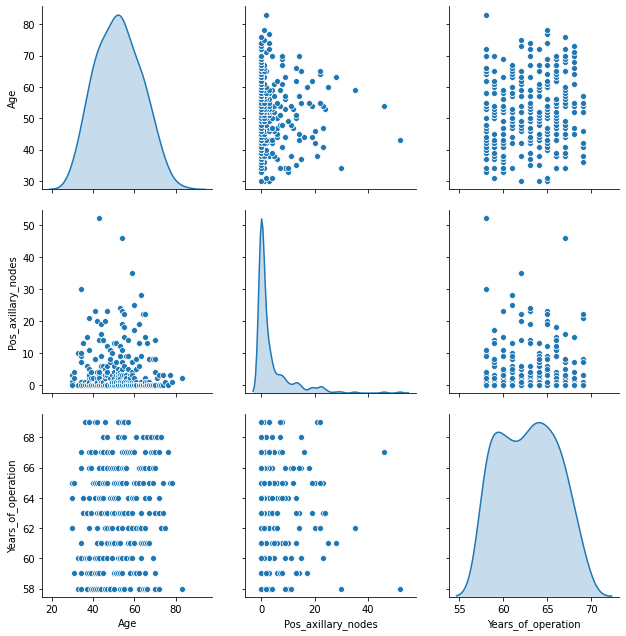

In [184]:
sns.pairplot(data=df_breast[['Age', 'Pos_axillary_nodes', 'Years_of_operation']], height=3, diag_kind='kde')

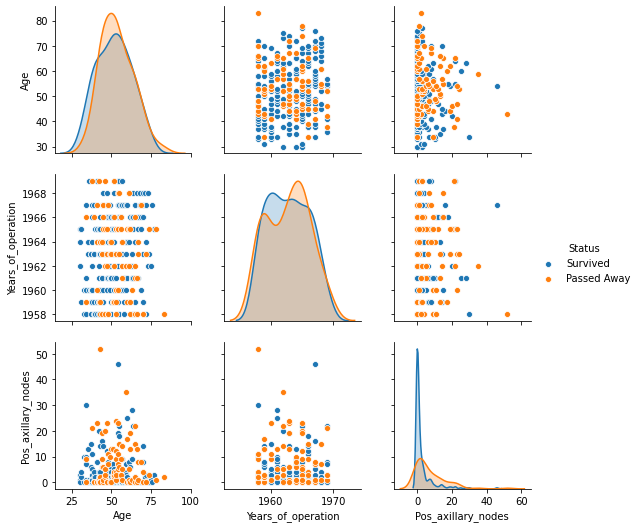

In [193]:
sns.pairplot(df_Breast, diag_kind = 'kde', hue='Status')

In [194]:
df_breast[['Age', 'Pos_axillary_nodes', 'Years_of_operation']].corr()

,Age,Pos_axillary_nodes,Years_of_operation
Age,1.000000,-0.063176,0.089529
Pos_axillary_nodes,-0.063176,1.000000,-0.003764
Years_of_operation,0.089529,-0.003764,1.000000


### Observation
It can be noted from the above pair plots and the correlation that there is no correlation between any of the variables. 

## Univariate Analysis (contd with Violin Plot)

Text(0.5, 0, 'Survival Status')

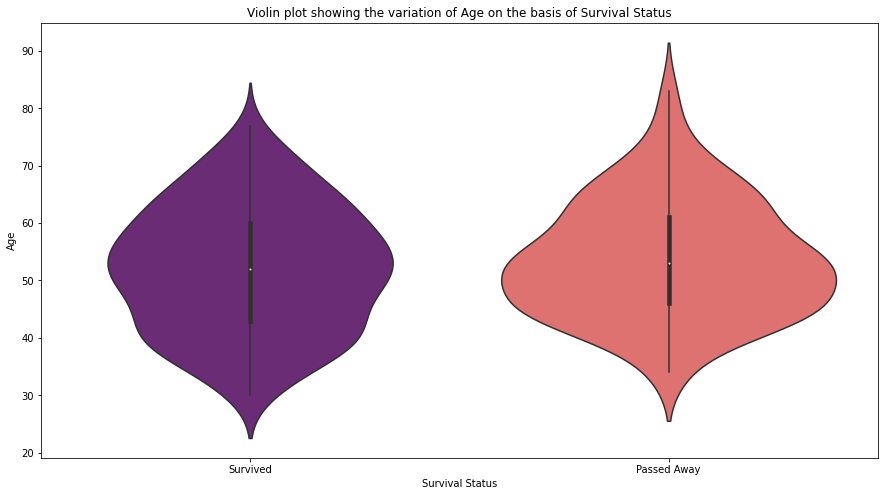

In [221]:
# Using seaborn's violinplot function to draw a violin plot 

plt.figure(figsize=(15,8))
sns.violinplot(data=df_Breast, x='Status', y='Age', palette='magma')

plt.title('Violin plot showing the variation of Age on the basis of Survival Status')
plt.xlabel('Survival Status')

Text(0, 0.5, 'Positive Axillary Node')

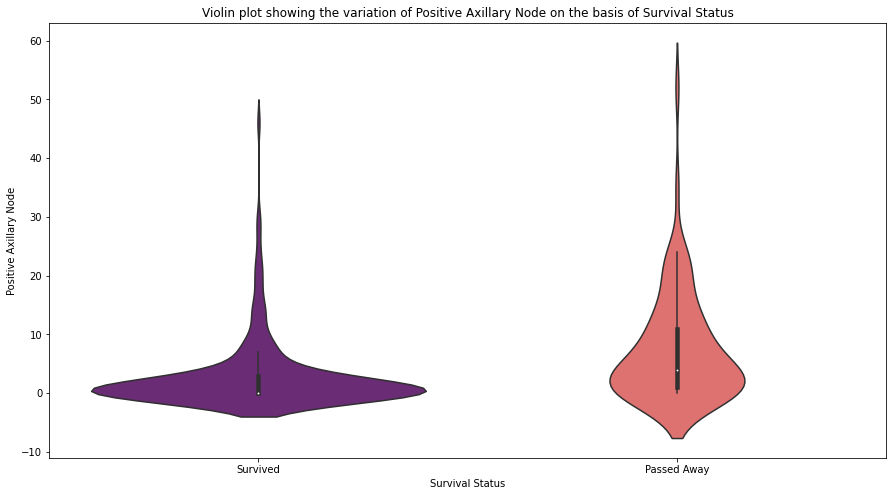

In [222]:
# Using seaborn's violinplot function to draw a violin plot 

plt.figure(figsize=(15,8))
sns.violinplot(data=df_Breast, x='Status', y='Pos_axillary_nodes', palette='magma')

plt.title('Violin plot showing the variation of Positive Axillary Node on the basis of Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Positive Axillary Node')

Text(0, 0.5, 'Year of Operation')

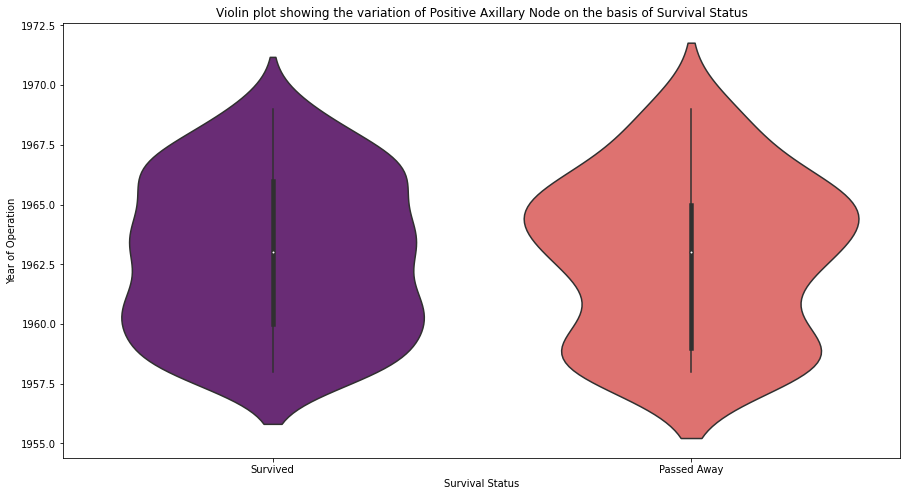

In [223]:
# Using seaborn's violinplot function to draw a violin plot 

plt.figure(figsize=(15,8))
sns.violinplot(data=df_Breast, x='Status', y='Years_of_operation', palette='magma')

plt.title('Violin plot showing the variation of Positive Axillary Node on the basis of Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Year of Operation')

## Observation
No new observations from the above violin plots to be added, other than the ones established before


## Multivariate Analysis

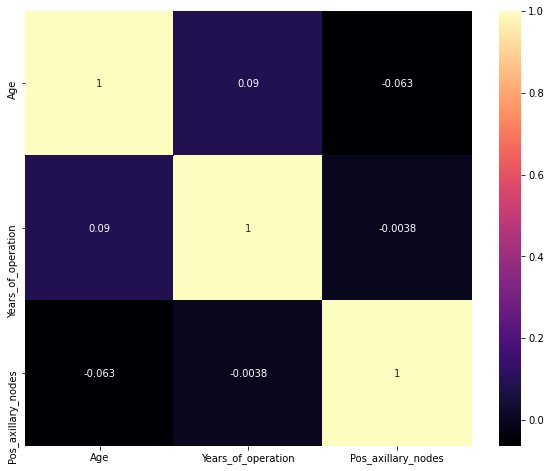

In [220]:
#Heatmap
corr_mat = df_Breast.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='magma')

## Observation
From the above pair plots and heatmap, it can be seen that there is no correlation between any of the variables. 

## Conclusion from EDA 
1. From a total of 306 patients considered for the study, 225 of them suvived 5 years post operation while 81 passed away
2. We cannot conclude that a patient will definitely survive 5 years post operation on the basis of age of the patient.
3. If the patient has 0 or 1 Positive Axillary Nodes, chances of survival is pretty high, though it is not guaranteed.
4. It is not possible to ascertain the survival status of a new patient on the parameters provided here, as we cannot come with a strong correlation with any of the values.
5. Though the minimum age of patients is 30, the average age of patients in the data set is closer to 53 years which implies, women above 50 years of age have to be careful about breast cancer and need to be regularly tested for the same.

